In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:

data = pd.read_csv("ShampooSalesData.csv")

In [3]:
data

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


## Preparing The Data

In [4]:
data = data.iloc[0:data.shape[0]-1,:]

In [5]:
data.Month="190"+ data.Month
data.head()

C:\Users\lalin\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Month,Sales of shampoo over a three year period
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3


In [6]:
#checking if month is a string 
data.Month[1]

'1901-02'

In [7]:
data.Month = pd.to_datetime(data.Month,format ='%Y-%m')
data.head()

C:\Users\lalin\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [8]:
#make the index column the month column
data.set_index('Month',inplace=True)

In [9]:
data.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales of shampoo over a three year period,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


## Visualize the data

Text(0,0.5,'Shampoo Sales')

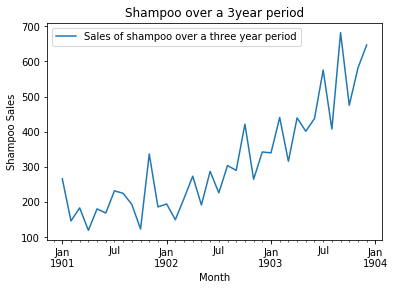

In [11]:
data.plot()
plt.title('Shampoo over a 3year period')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')

In [12]:
timeSeries=data['Sales of shampoo over a three year period']

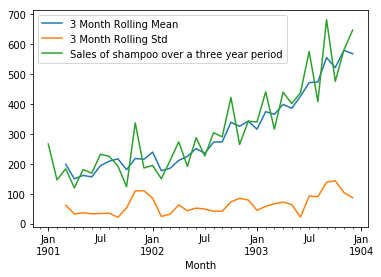

In [13]:
timeSeries.rolling(3).mean().plot(label='3 Month Rolling Mean')
timeSeries.rolling(3).std().plot(label='3 Month Rolling Std')
timeSeries.plot()
plt.legend()

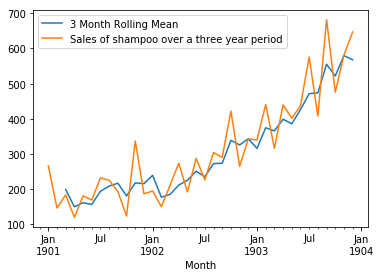

In [14]:
timeSeries.rolling(3).mean().plot(label='3 Month Rolling Mean')
timeSeries.plot()
plt.legend()

## Decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

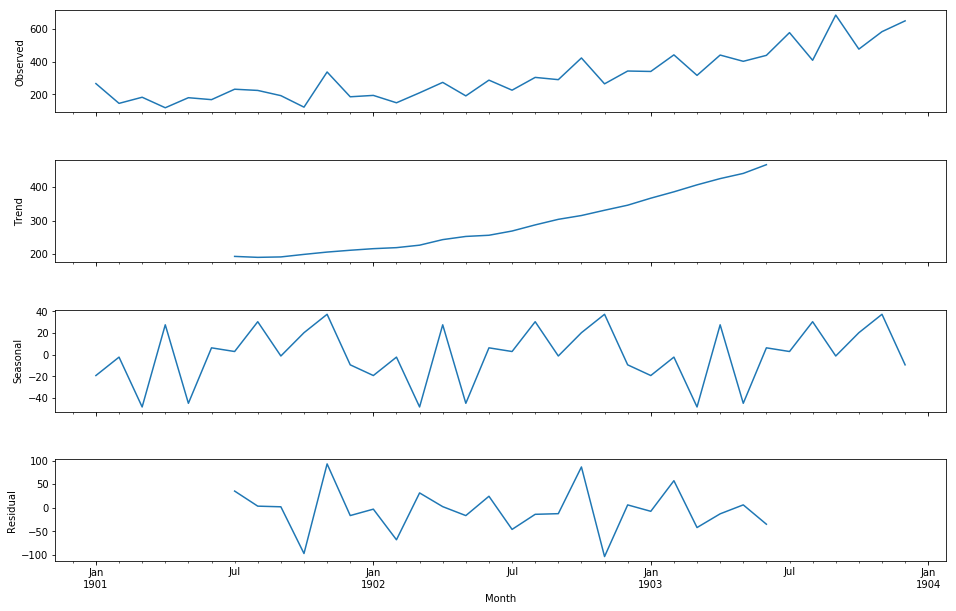

In [16]:
decomposition=seasonal_decompose(data['Sales of shampoo over a three year period'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,10)

## checking if its stationary

In [17]:

from statsmodels.tsa.stattools import adfuller

In [18]:
result=adfuller(data['Sales of shampoo over a three year period'])
print(result)

(3.0601420836411806, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


In [19]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.0601420836411806
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
def adfCheck(time_series):
    adfuller_result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(adfuller_result, labels):
        print(label + ": " + str(value))
    return adfuller_result

In [23]:
def findStationarityAndDifference(time_series):
    
    for i in range(0,10):
        
        if(i==0):
            print('Actual Time Series')
        else:
            print(str(i)+'-Differenced Time Series')
            
        print('-' * 60)

        p_stationarity = adfCheck(time_series)[1]   
        
        print("\nStationarity:")
        
        if(p_stationarity <= 0.05):
            print('Data is Stationary')
            break
        else:
            print('Data is Non-Stationary\n')
            time_series = (time_series - time_series.shift(1))
            time_series.dropna(inplace = True)
    return i, time_series

In [24]:
d,stationarySeries = findStationarityAndDifference(data['Sales of shampoo over a three year period'])

Actual Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: 3.0601420836411806
p-value: 1.0
#Lags Used: 10
Number of Observations Used: 25

Stationarity:
Data is Non-Stationary

1-Differenced Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: -7.249074055553854
p-value: 1.7998574141687034e-10
#Lags Used: 1
Number of Observations Used: 33

Stationarity:
Data is Stationary


In [25]:
stationarySeries

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Name: Sales of shampoo over a three year period, dtype: float64

# of times difference =  1


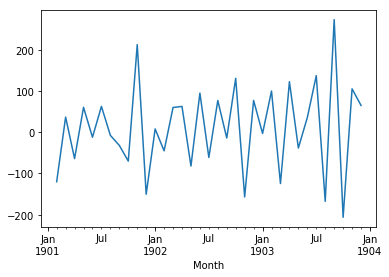

In [27]:
print('# of times difference = ',d)
stationarySeries.plot()

## Plotting Autocorrelation and Partial Autocorrelation Plots

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.tools.plotting import autocorrelation_plot

C:\Users\lalin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


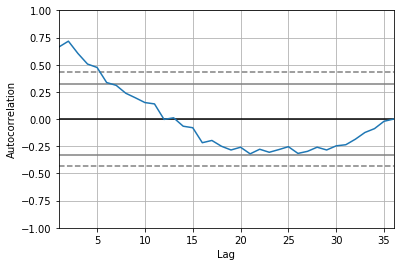

In [29]:

autocorrelation_plot(data['Sales of shampoo over a three year period'])

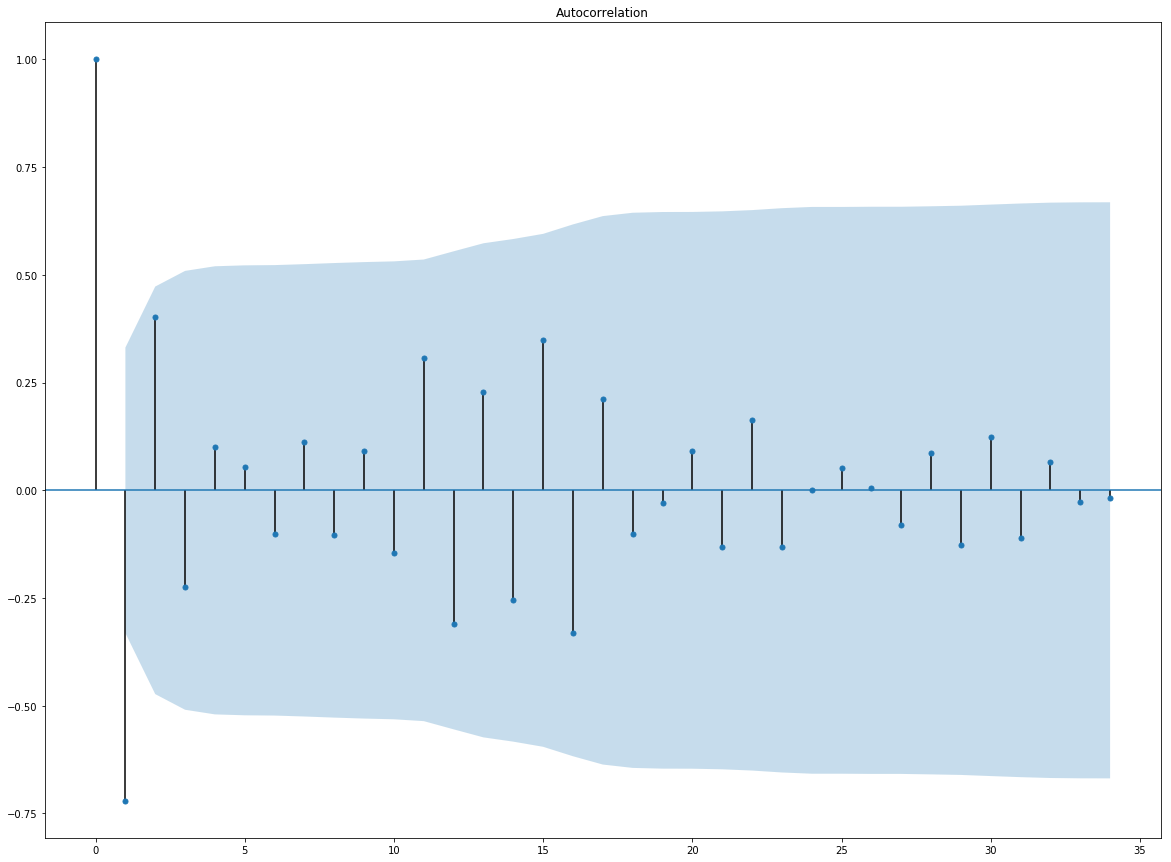

In [32]:
fig_first = plot_acf(stationarySeries)
fig_first.set_size_inches(20,15)

C:\Users\lalin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


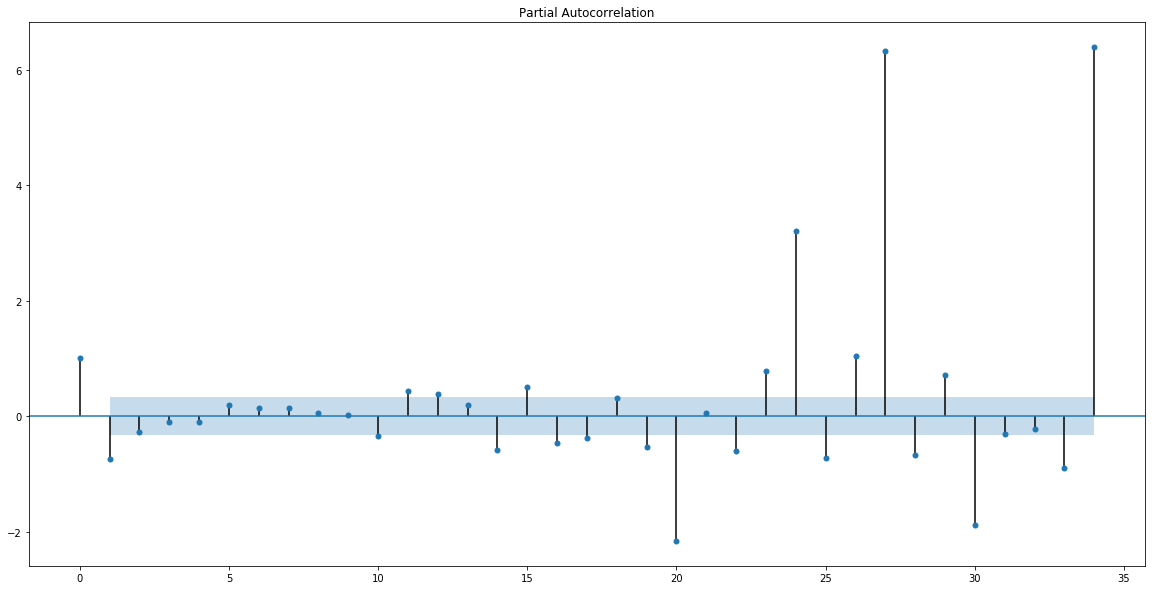

In [34]:
result = plot_pacf(stationarySeries)
result.set_size_inches(20,10)

In [35]:
stationarySeries

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Name: Sales of shampoo over a three year period, dtype: float64

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data['Sales of shampoo over a three year period'],order =(4,1,2)) 
arima_results = model.fit()
print(arima_results.summary())

C:\Users\lalin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\lalin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(4, 1, 2)   Log Likelihood                -192.115
Method:                                                css-mle   S.D. of innovations             53.288
Date:                                         Thu, 08 Nov 2018   AIC                            400.231
Time:                                                 01:12:25   BIC                            412.674
Sample:                                             02-01-1901   HQIC                           404.526
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

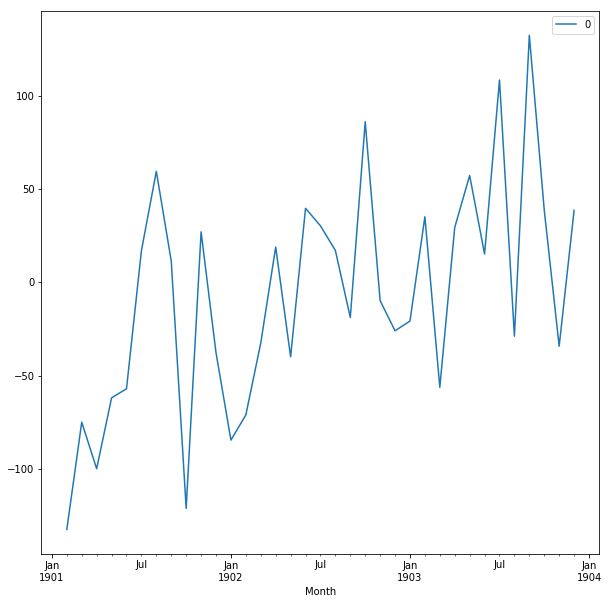

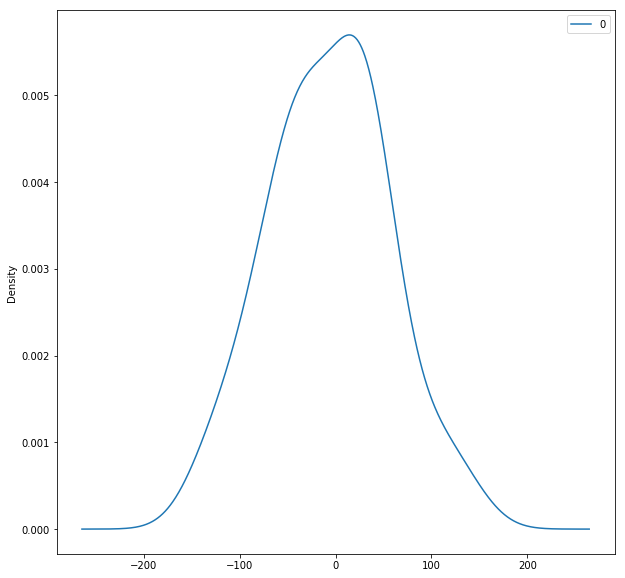

In [37]:
residuals = pd.DataFrame(arima_results.resid)
residuals.plot(figsize=(10,10))
residuals.plot(kind='kde',figsize=(10,10) )

In [38]:
residuals.describe()

,0
count,35.000000
mean,-7.005510
std,61.631853
min,-132.370008
25%,-48.066052
50%,-9.783937
75%,32.706477
max,132.329410


In [39]:
arima_results.aic

400.2307795387977

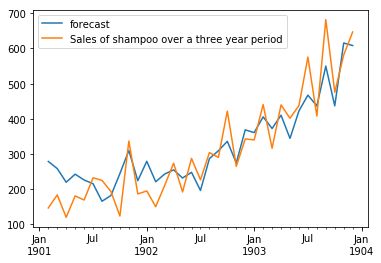

In [40]:
predictedPlot= arima_results.plot_predict()

predicted=363.439806, expected=342.300000
predicted=363.439806, expected=339.700000
predicted=363.439806, expected=440.400000
predicted=363.439806, expected=315.900000
predicted=363.439806, expected=439.300000
predicted=363.439806, expected=401.300000
predicted=363.439806, expected=437.400000
predicted=363.439806, expected=575.500000
predicted=363.439806, expected=407.600000
predicted=363.439806, expected=682.000000
predicted=363.439806, expected=475.300000
predicted=363.439806, expected=581.300000
predicted=363.439806, expected=646.900000

 Test RMSE: 154.566

 Test MSE: 23890.565

 Model aic score 254.94344407522948 
 Model bic score 263.67178370209604


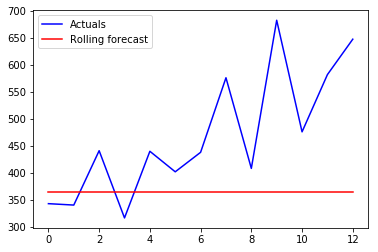

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X =data['Sales of shampoo over a three year period'].values 
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order=(4,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

RMSE= sqrt(mean_squared_error(test, predictions))
MSE = mean_squared_error(test, predictions)

print('\n Test RMSE: %.3f' % RMSE)
print('\n Test MSE: %.3f' % MSE)

print ("\n Model aic score",model_fit.aic, "\n Model bic score", model_fit.bic)

# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()

In [43]:

import warnings
warnings.filterwarnings('ignore')
ararray = X
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

(0, 1, 0) 430.87311187552797
(0, 1, 1) 409.0126622411773
(1, 1, 0) 406.02228959235015
(1, 1, 1) 402.4666524180001
(1, 1, 2) 401.5247943797664
(1, 1, 3) 403.52417287501396
(2, 1, 0) 403.6275641166603
(2, 1, 1) 404.28621423318384
(3, 1, 0) 404.6924591816536
(3, 1, 1) 406.1395443929499
(4, 1, 0) 404.78676855670926
(4, 1, 1) 406.5796403612153
(4, 1, 2) 400.2307795387977
(4, 1, 3) 400.6567725868804
(5, 1, 0) 406.33987702440857
(5, 1, 1) 416.03570427283387
(5, 1, 2) 400.7258210618472
(5, 1, 3) 402.4996309748759
Best Model is : (4, 1, 2)


predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


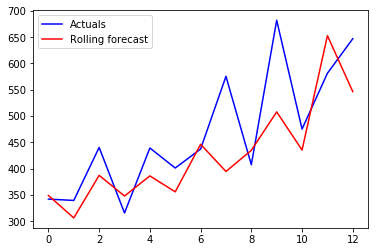

In [45]:
X = data['Sales of shampoo over a three year period'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    #sampodataset['Forecast']=output[0]
    yhat = output[0]
    
    predictions.append(yhat)
   
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
#sampodataset['Forecast']=predictions
# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()